# Final Project

**Due date: Saturday, December 9th**

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

In [2]:
library('tidyverse')
install.packages('lubridate')
library('lubridate')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



### The dataset I chose is Big Tech Stock Prices, which contains 14 big tech companies' stock prices from 2010 to 2022.
All stock_symbols have 3271 prices, except META (2688) and TSLA (3148) because they were not publicly traded for part of the period examined.


In [3]:

big_tech_stock_prices <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-02-07/big_tech_stock_prices.csv')
big_tech_companies <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-02-07/big_tech_companies.csv')

big_tech_companies |> head()
big_tech_stock_prices |> head()

Rows: 45088 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): stock_symbol
dbl  (6): open, high, low, close, adj_close, volume
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 14 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): stock_symbol, company

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


stock_symbol,company
<chr>,<chr>
AAPL,Apple Inc.
ADBE,Adobe Inc.
AMZN,"Amazon.com, Inc."
CRM,"Salesforce, Inc."
CSCO,"Cisco Systems, Inc."
GOOGL,Alphabet Inc.


stock_symbol,date,open,high,low,close,adj_close,volume
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800
AAPL,2010-01-11,7.600000,7.607143,7.444643,7.503929,6.396483,462229600


#### First, I compare four big companies, Apple, Tesla, Meta, and Google stock prices. 
##### Below is the table filter for those 4 companies, and the chart shows the trend of each day's close price. 

In [4]:
four_price = big_tech_stock_prices |> 
    filter(stock_symbol==c('AAPL', 'TSLA', 'META', 'GOOGL'))

four_price |> head()
#aapl_tsla_price |> tail()

stock_symbol,date,open,high,low,close,adj_close,volume
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800
AAPL,2010-01-14,7.503929,7.516429,7.465000,7.479643,6.375781,432894000
AAPL,2010-01-21,7.574286,7.618214,7.400357,7.431071,6.334377,608154400
AAPL,2010-01-27,7.387500,7.520714,7.126071,7.424286,6.328594,1722568400
AAPL,2010-02-02,6.996786,7.011429,6.906429,6.995000,5.962664,698342400


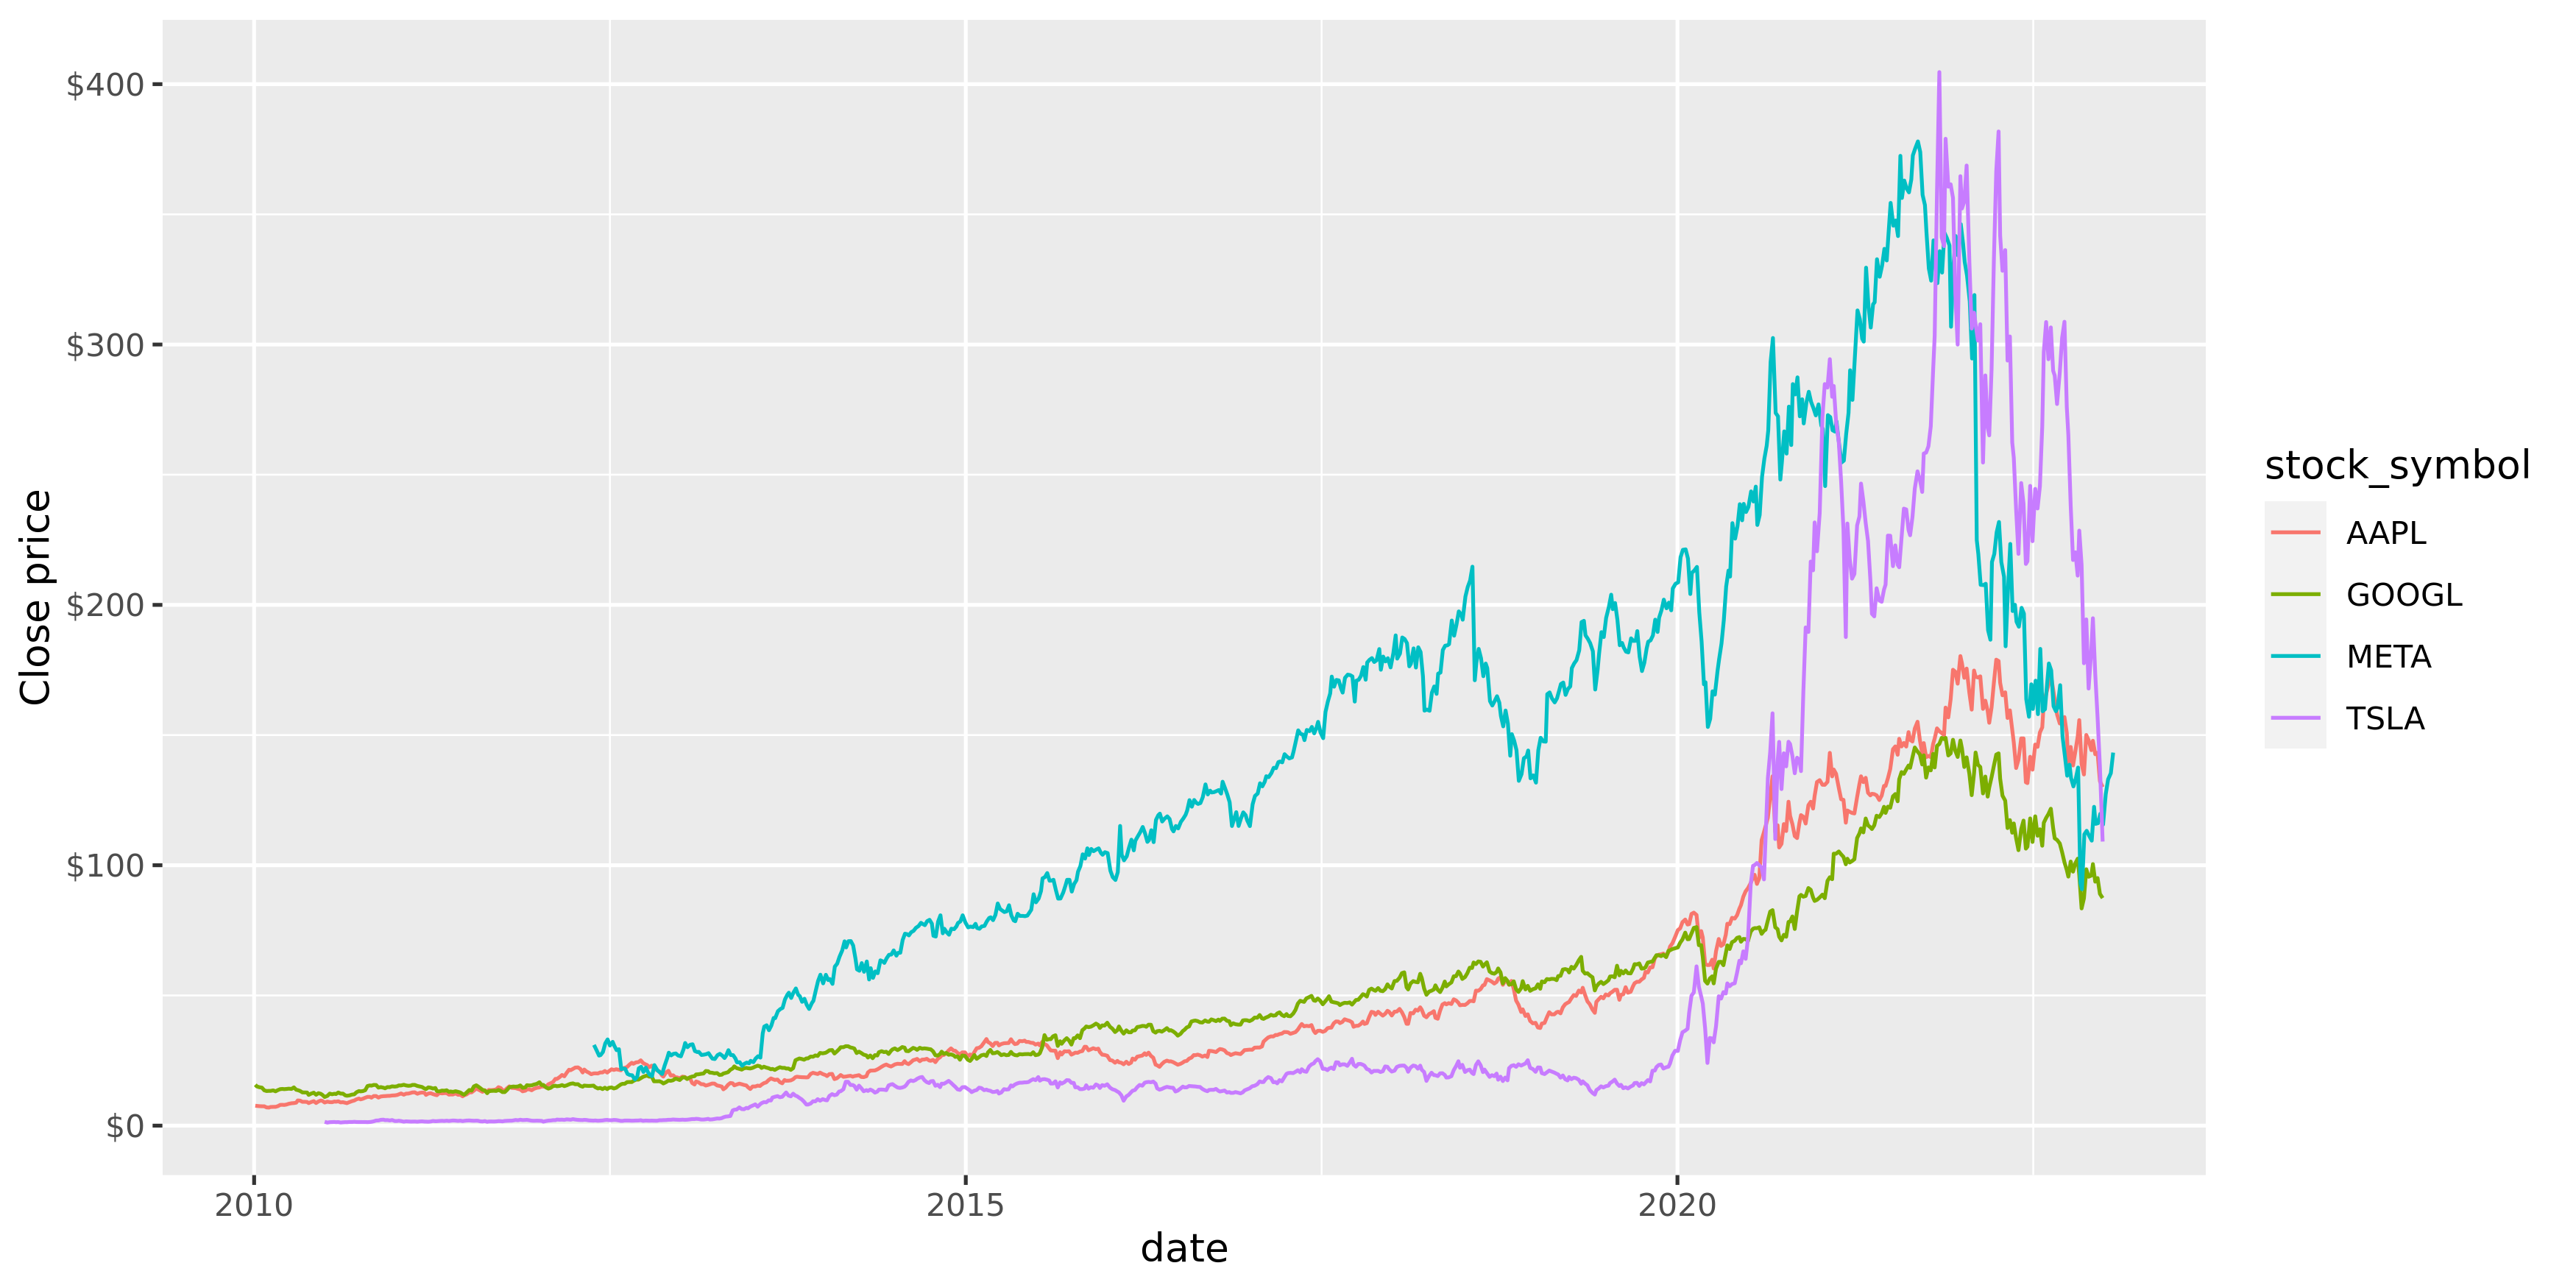

In [5]:
options(repr.plot.res = 350, repr.plot.width = 10, repr.plot.height = 5)

p = ggplot(four_price, aes(x = date, y = close, color = stock_symbol )) +
    geom_line() +
    scale_y_continuous(labels = scales::dollar_format()) + labs(y = 'Close price')

p


# 


Below is a table of each company's highest price in each year from 2010 to 2022.

In each year, the highest price is summarized, and the table is grouped by stock symbol by each year. 

The graph shows the maximum price trend for each stock. 


In [6]:
date = ymd(big_tech_stock_prices$date)

In [12]:
max_price = big_tech_stock_prices |> 
    mutate(Year = year(date)) |>
    group_by(stock_symbol, Year) |> 
    summarize(maxprice = max(high))

max_price |> head()

`summarise()` has grouped output by 'stock_symbol'. You can override using the
`.groups` argument.


stock_symbol,Year,maxprice
<chr>,<dbl>,<dbl>
AAPL,2010,11.66643
AAPL,2011,15.23929
AAPL,2012,25.18107
AAPL,2013,20.54071
AAPL,2014,29.93750
AAPL,2015,33.63500


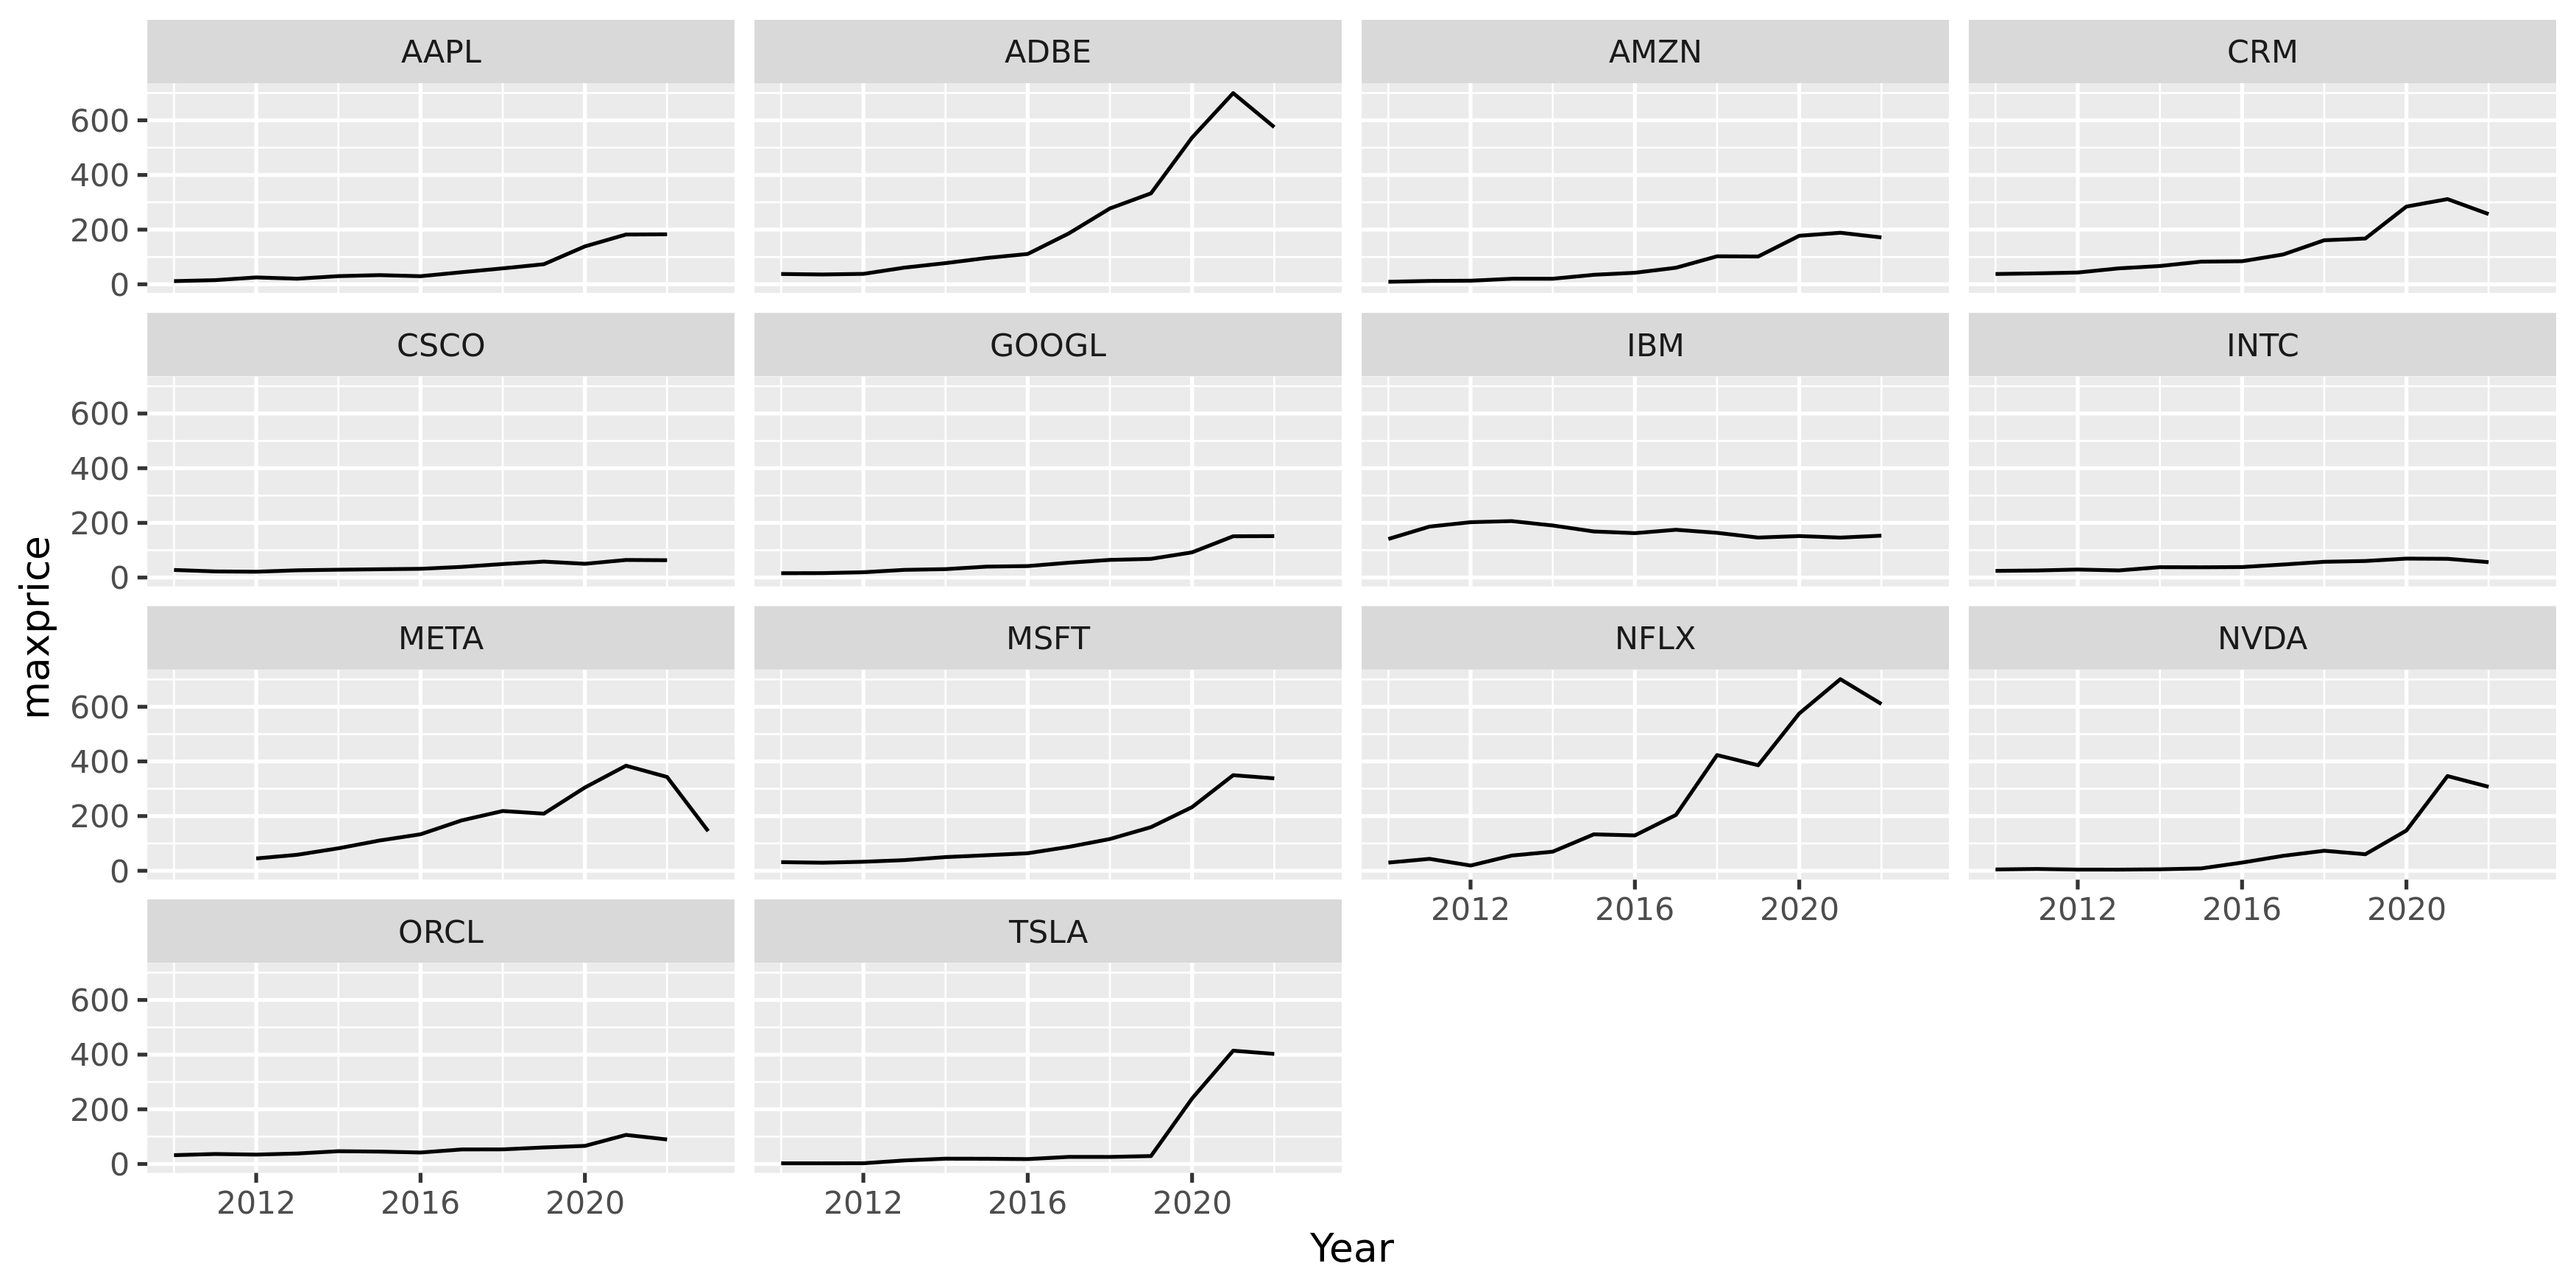

In [8]:

p = ggplot(max_price, aes(x=Year, y=maxprice)) + 
    geom_line() +
    facet_wrap(~stock_symbol)

p